In [ ]:
import numpy as np
from collections import defaultdict

In [ ]:
# P(P | H) = given
# P(H | P) = ?

House features: 
1. Location
2. Number of rooms
3. Number of windows
4. Number of toilets
5. Number of balconoy
6. Price (Label)

Define the Problem:
we want to predict the house prices(y) based on features sunch as square footage(x)

Model setup:
1. Likelihood: Assume house prices follow a gussian distribution given the input x
2. Prior, Assign prior distribution to the parameters 

Bayes Theroem:
The likelihood (p(y| x,w,b,s)) and priors(p(w), p(b), p(s)) are combined to form the posterior

Prediction:
Use posterior predictive distribution to make the prediction for new data

In [3]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt


# Generate synthethic data
np.random.seed(42)
true_w = 3.5
true_b = 10.0
true_sigma = 2.0
n_samples = 100
x = np.random.uniform(0, 10, n_samples)
y = true_w * x + true_b + np.random.normal(0, true_sigma, n_samples)

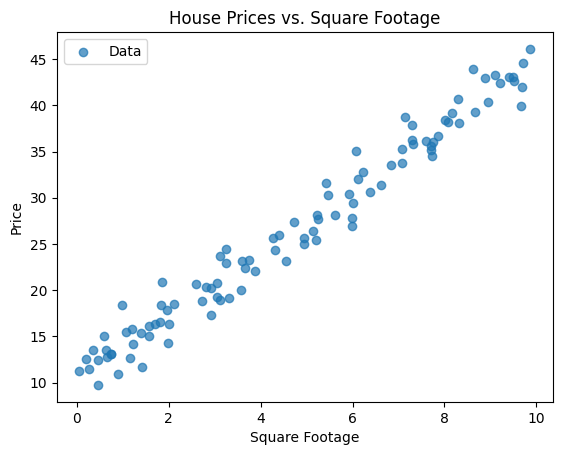

In [4]:
# Plot the data
plt.scatter(x, y, alpha=0.7, label="Data")
plt.xlabel("Square Footage")
plt.ylabel("Price")
plt.title("House Prices vs. Square Footage")
plt.legend()
plt.show()

In [5]:
def prior_w(w, tau_w=10):
    # Normal prior for w
    return (1 / np.sqrt(2 * np.pi * tau_w**2)) * np.exp(-0.5 * (w / tau_w)**2)

def prior_b(b, tau_b=10):
    # Normal prior for b
    return (1 / np.sqrt(2 * np.pi * tau_b**2)) * np.exp(-0.5 * (b / tau_b)**2)

In [6]:
def prior_sigma(sigma, beta=1):
    # Half-Cauchy prior for sigma
    if sigma <= 0:
        return 0
    return 2 / (np.pi * beta * (1 + (sigma / beta)**2))

In [7]:
def likelihood(y, x, w, b, sigma):
    n = len(y)
    mu = w * x + b
    return np.prod((1 / (np.sqrt(2 * np.pi * sigma**2))) * np.exp(-0.5 * ((y - mu) / sigma)**2))

In [8]:
def posterior(y, x, w, b, sigma):
    return likelihood(y, x, w, b, sigma) * prior_w(w) * prior_b(b) * prior_sigma(sigma)


In [9]:
w_values = np.linspace(2.0, 5.0, 50)
b_values = np.linspace(8.0, 12.0, 50)
sigma_values = np.linspace(0.5, 3.0, 50)

posterior_grid = np.zeros((len(w_values), len(b_values), len(sigma_values)))

for i, w in enumerate(w_values):
    for j, b in enumerate(b_values):
        for k, sigma in enumerate(sigma_values):
            posterior_grid[i, j, k] = posterior(y, x, w, b, sigma)

# Normalize the posterior
posterior_grid /= np.sum(posterior_grid)


In [10]:
max_idx = np.unravel_index(np.argmax(posterior_grid), posterior_grid.shape)
w_map = w_values[max_idx[0]]
b_map = b_values[max_idx[1]]
sigma_map = sigma_values[max_idx[2]]

print(f"MAP Estimates: w = {w_map:.2f}, b = {b_map:.2f}, sigma = {sigma_map:.2f}")


MAP Estimates: w = 3.41, b = 10.45, sigma = 1.78


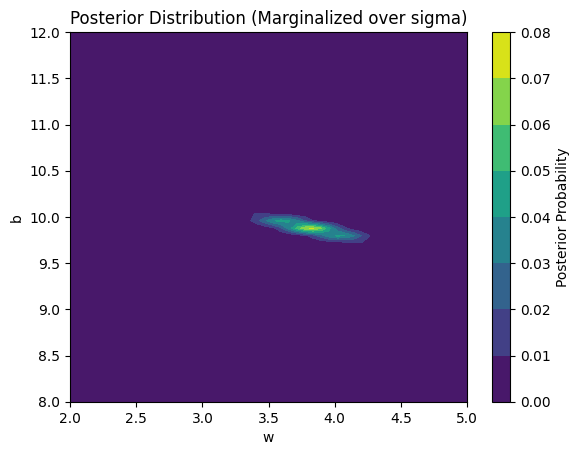

In [11]:
plt.contourf(w_values, b_values, np.sum(posterior_grid, axis=2))
plt.xlabel("w")
plt.ylabel("b")
plt.title("Posterior Distribution (Marginalized over sigma)")
plt.colorbar(label="Posterior Probability")
plt.show()
